In [1]:
import sys
sys.path.append('..')

In [2]:
from config_simulation import (
    algo,
    simulation_linear_regression,
    simulation_logistic_regression,
    simulation_geometric_median,
    simulation_spherical_distribution,
    simulation_p_means,
    eval_covtype,
    N,
    n,
)

optimizer_list = [
    algo.WASGD(),
    algo.SNARiccati(),
    algo.WASNARiccati(),
    # algo.WASNARiccati(compute_hessian_theta_avg=False),
    algo.USNA(c_nu=5.0),
    algo.UWASNA(c_nu = 5.0),
    algo.UWASNA(c_nu = 5.0, compute_hessian_theta_avg=False),
    algo.UWASNA(c_nu = 5.0, use_hessian_avg=False),
    algo.UWASNA(c_nu = 5.0, compute_hessian_theta_avg=False, use_hessian_avg=False),
    algo.UWASNA(c_nu = 5.0, algo='right', generate_Z="normal"),
]

import copy
optimizer_list_without_riccati = copy.deepcopy(optimizer_list)
optimizer_list_without_riccati[1] = algo.SNA()
optimizer_list_without_riccati[2] = algo.WASNA()
# optimizer_list_without_riccati[3] = algo.WASNA(compute_hessian_theta_avg=False)

In [3]:
# N = 2
# n = 1000

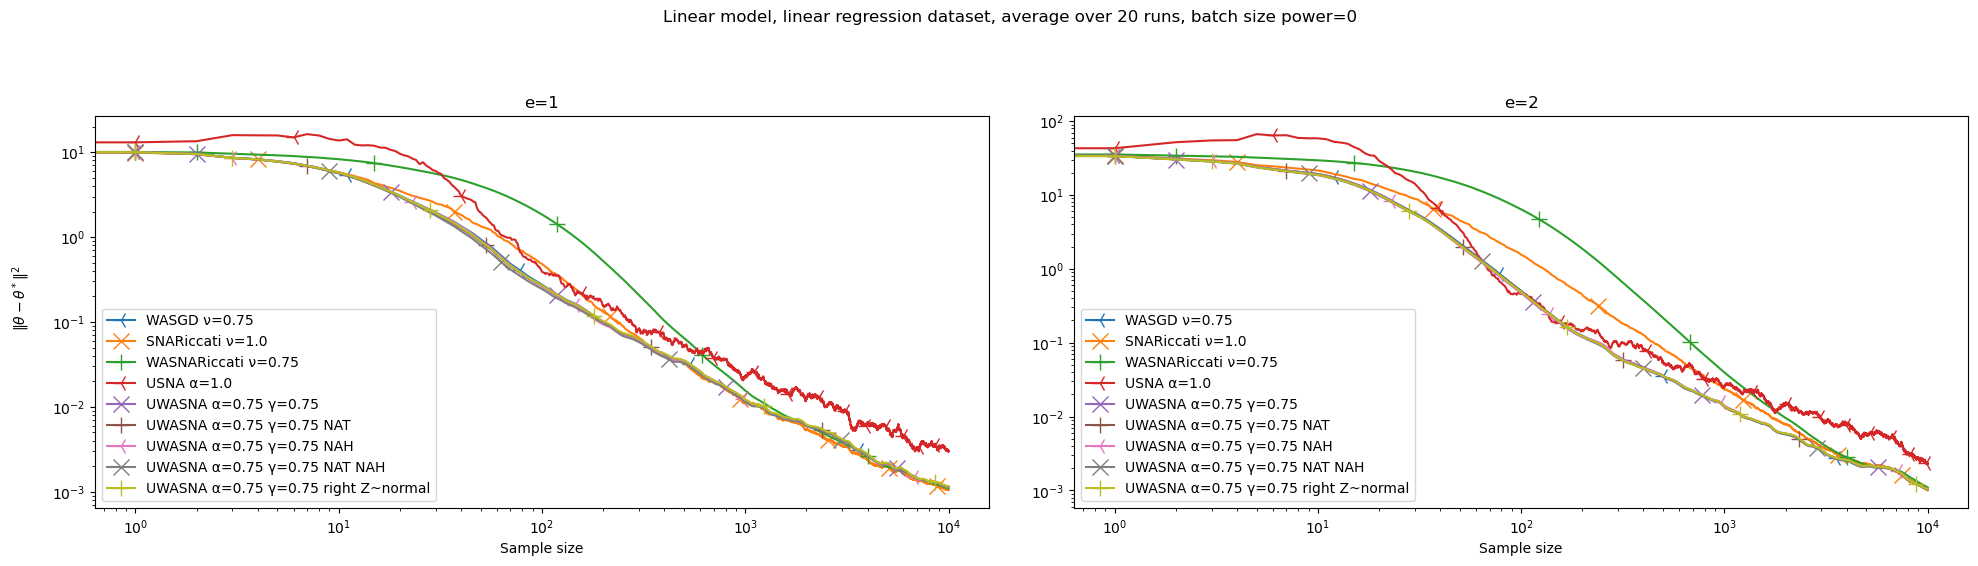

In [4]:
simulation = simulation_linear_regression(optimizer_list=optimizer_list)
simulation.run_multiple_track_errors(N=N, n=n)

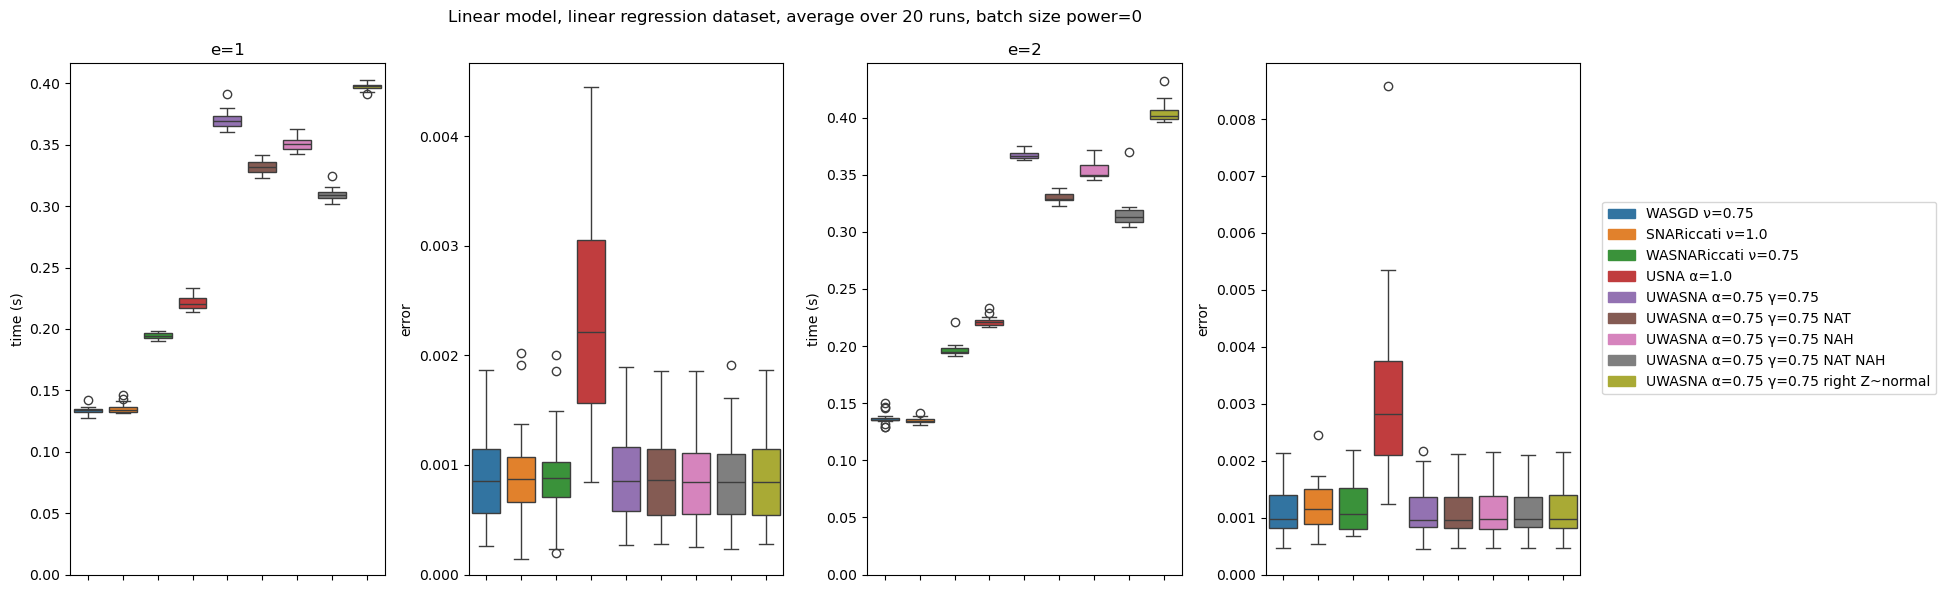

In [5]:
simulation.run_multiple_track_time(N=N, n=n)

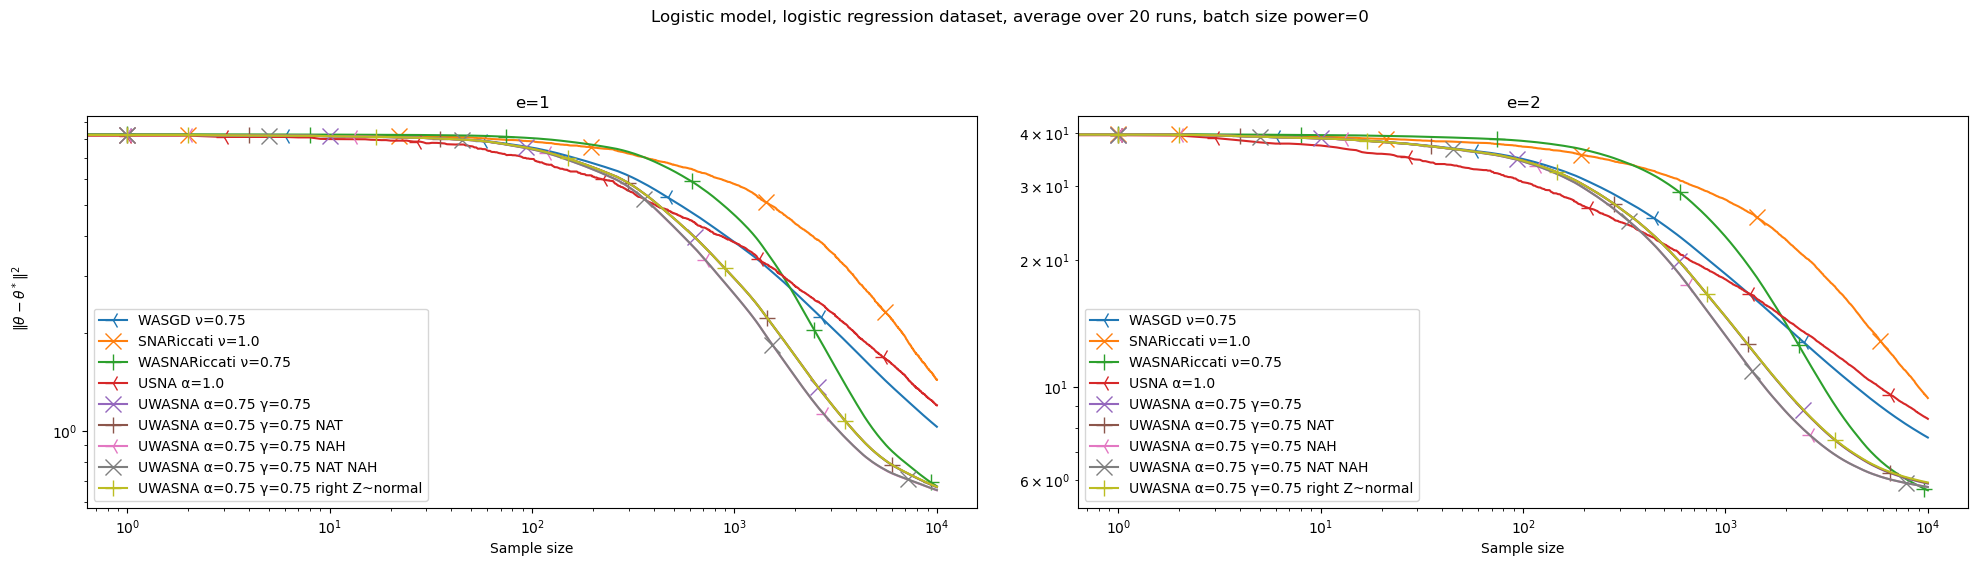

In [6]:
simulation = simulation_logistic_regression(optimizer_list=optimizer_list)
simulation.run_multiple_track_errors(N=N, n=n)

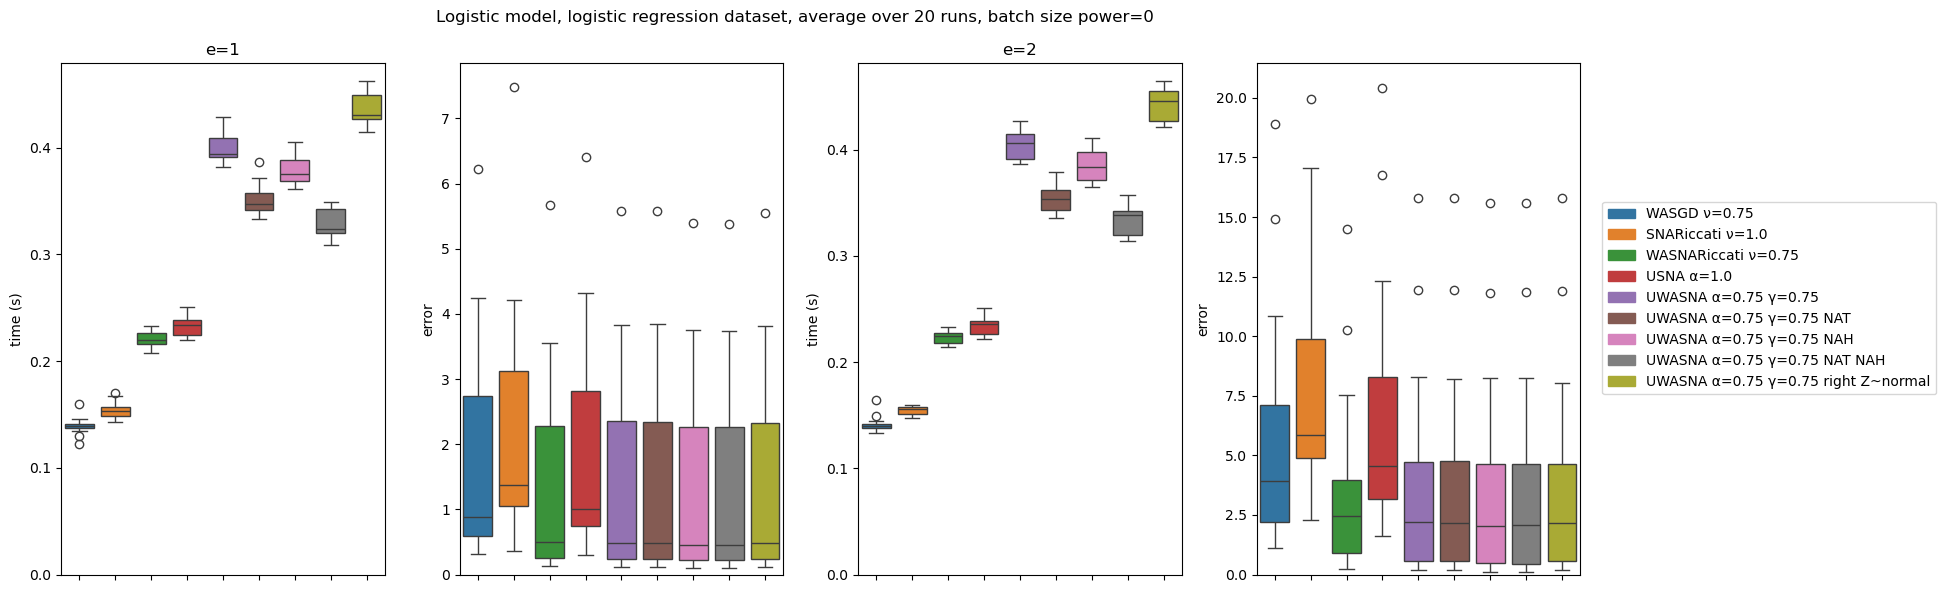

In [7]:
simulation.run_multiple_track_time(N=N, n=n)

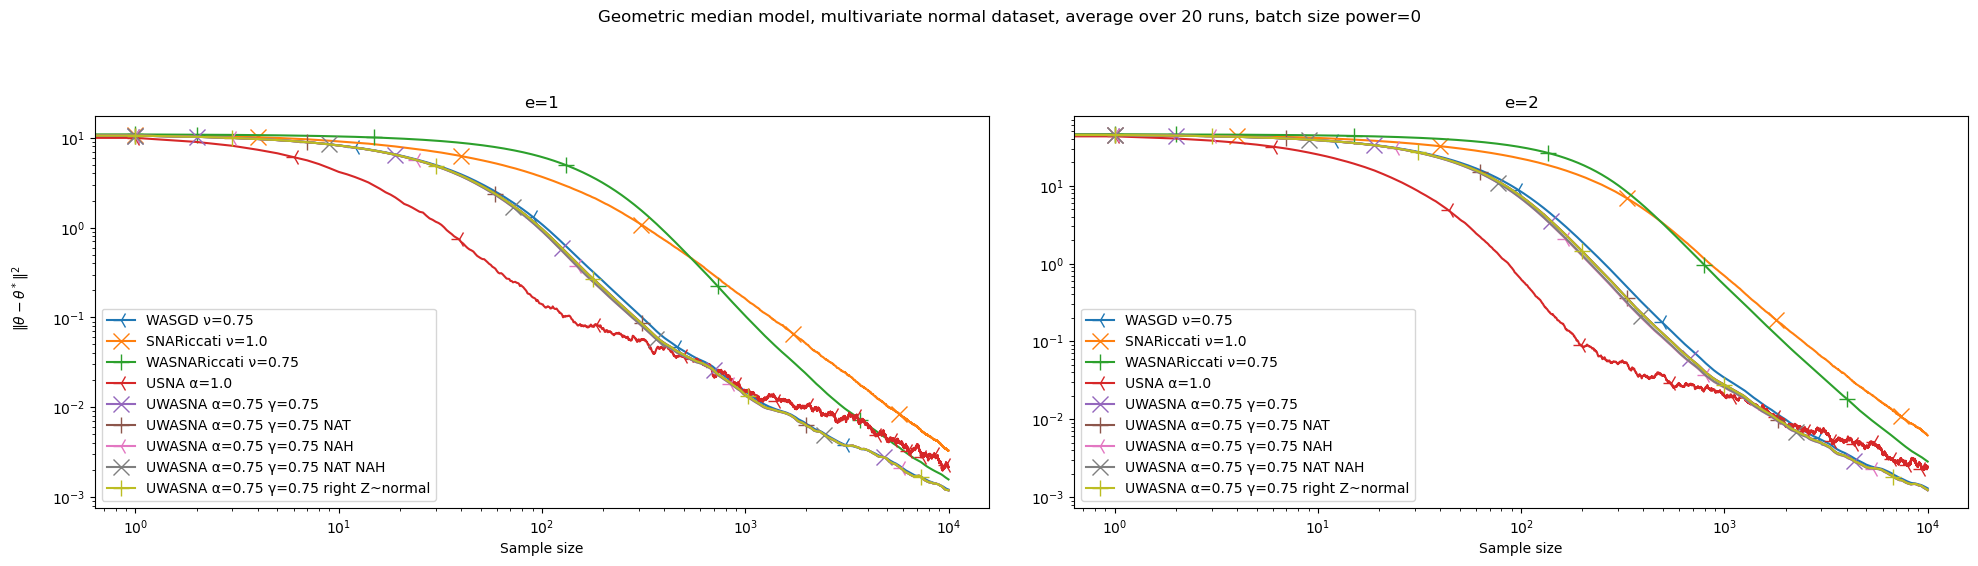

In [8]:
simulation = simulation_geometric_median(optimizer_list=optimizer_list)
simulation.run_multiple_track_errors(N=20, n=n)

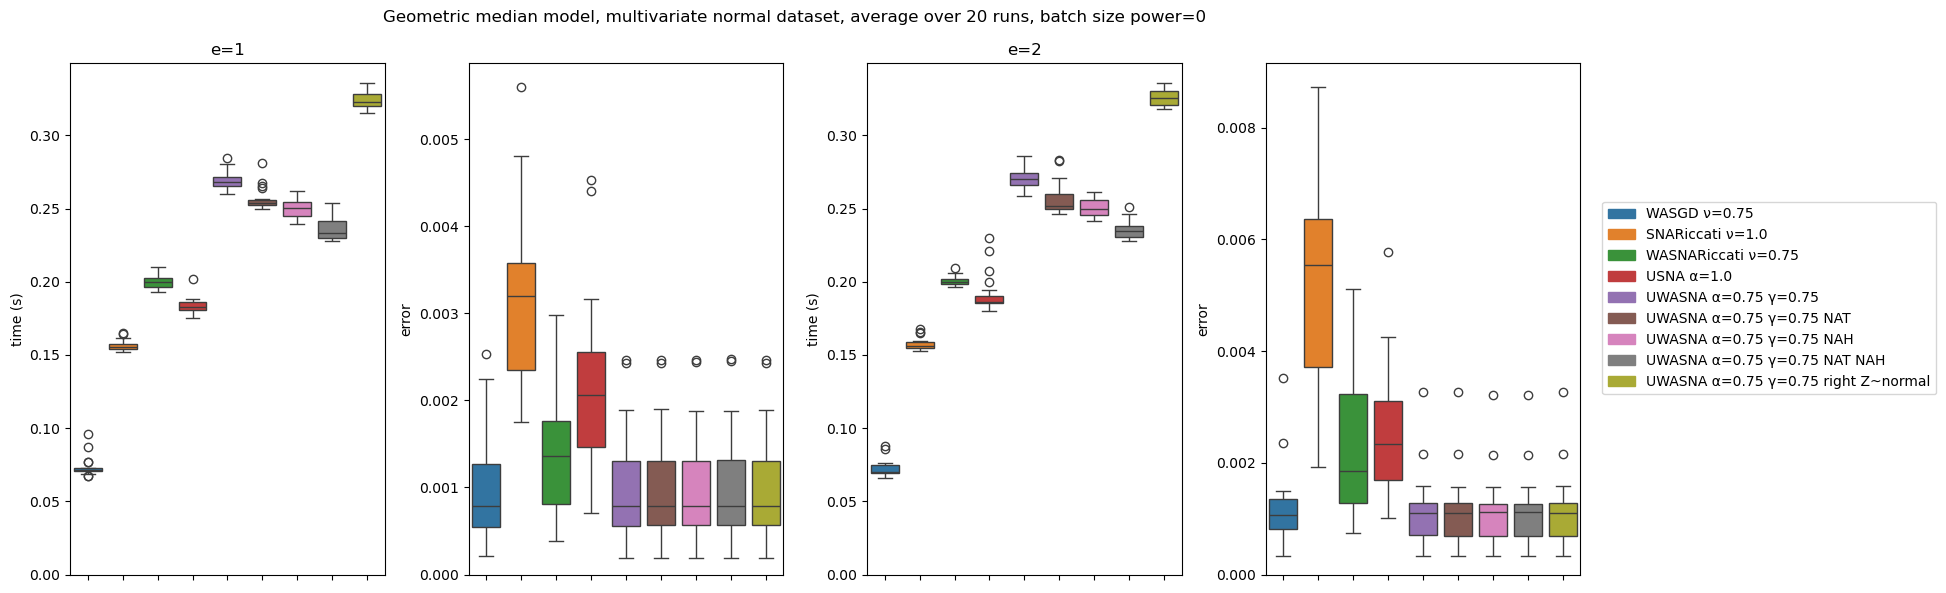

In [9]:
simulation.run_multiple_track_time(N=N, n=n)

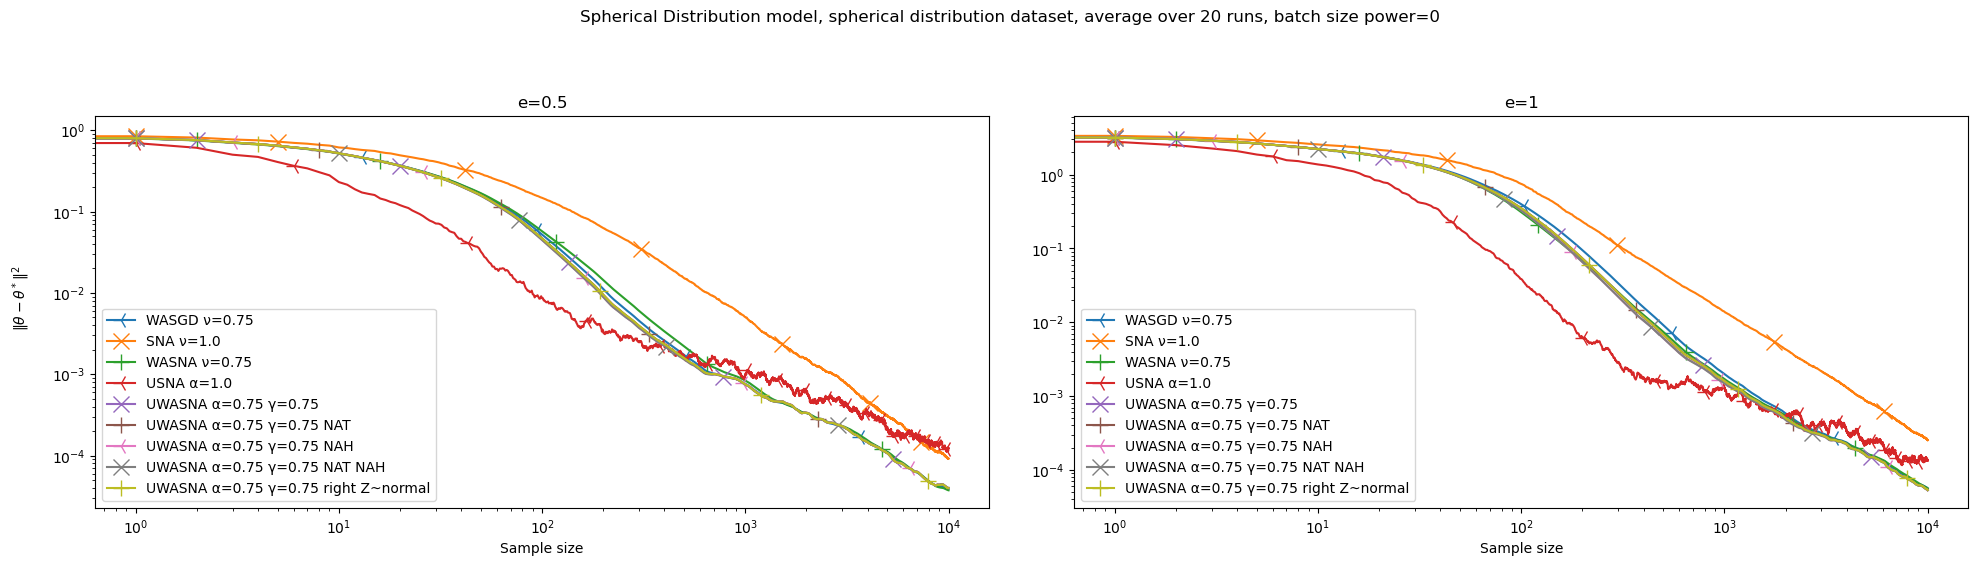

In [10]:
simulation = simulation_spherical_distribution(
    optimizer_list=optimizer_list_without_riccati
)
simulation.run_multiple_track_errors(N=N, n=n)

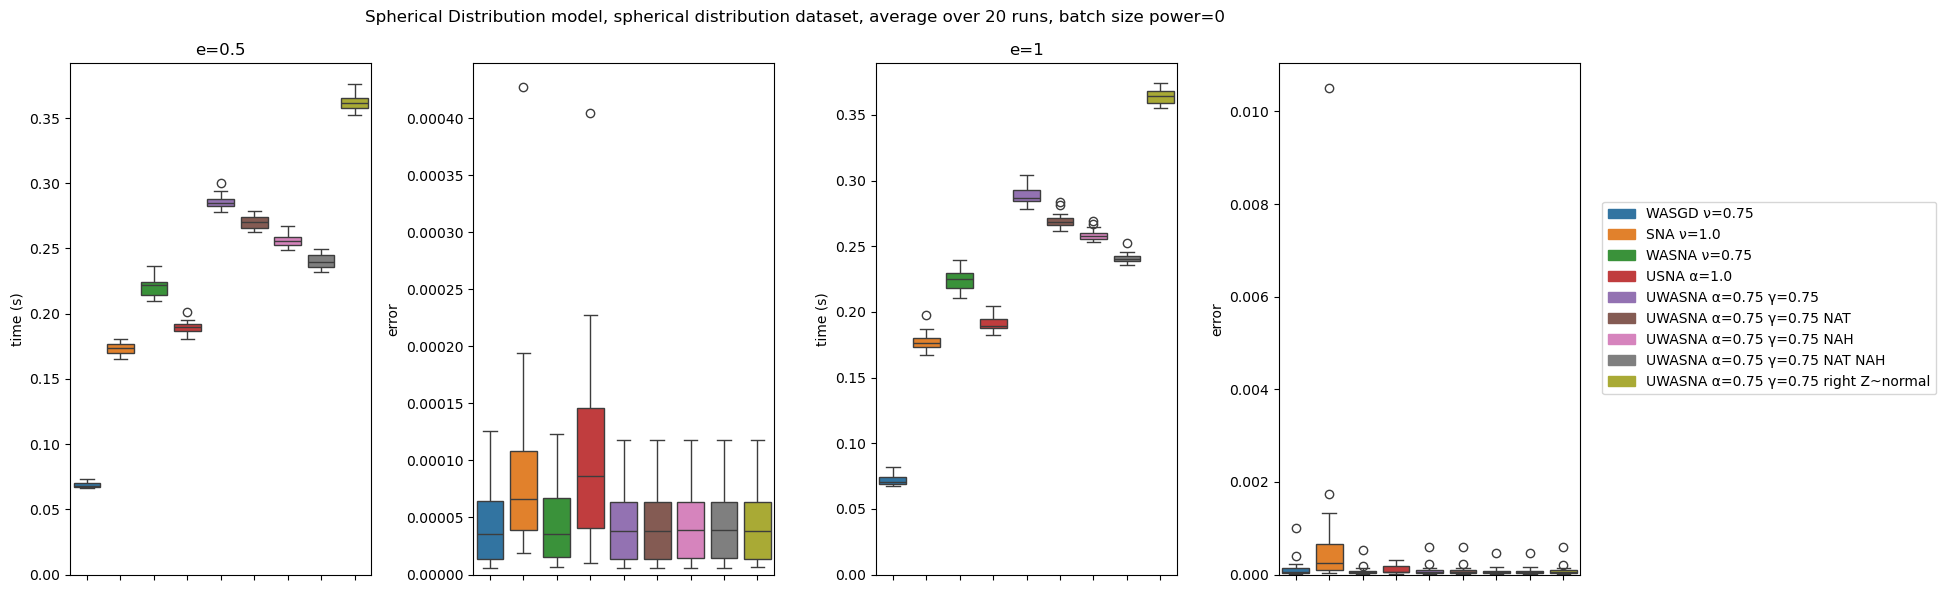

In [11]:
simulation.run_multiple_track_time(N=N, n=n)

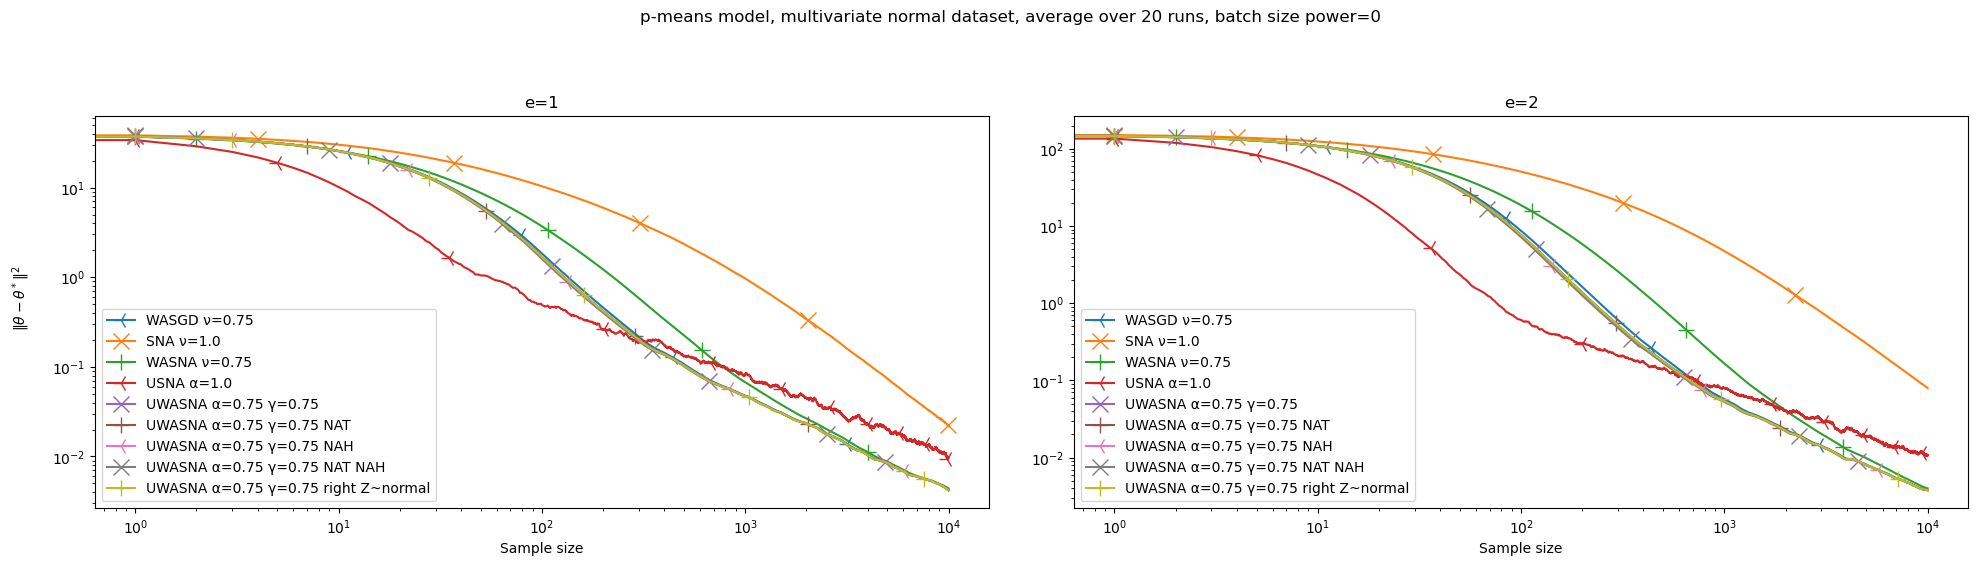

In [12]:
simulation = simulation_p_means(optimizer_list=optimizer_list_without_riccati)
simulation.run_multiple_track_errors(N=N, n=n)

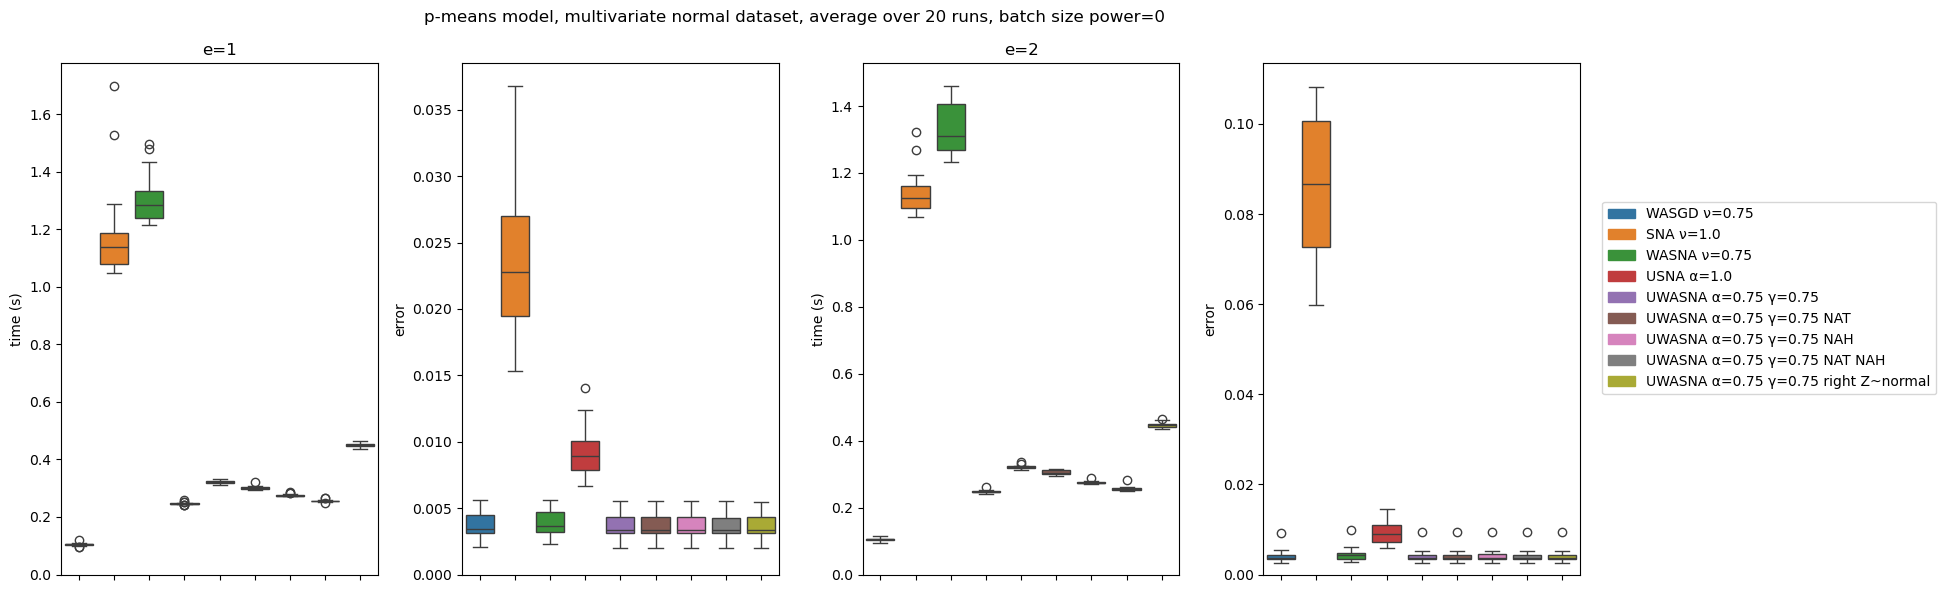

In [13]:
simulation.run_multiple_track_time(N=N, n=n)

In [14]:
eval = eval_covtype(optimizer_list=optimizer_list)
_, _ = eval.run_track_time()

Optimizers:   0%|          | 0/9 [00:00<?, ?it/s]

Data:   0%|          | 0/464809 [00:00<?, ?it/s]

,WASGD ν=0.75,SNARiccati ν=1.0,WASNARiccati ν=0.75,USNA α=1.0,UWASNA α=0.75 γ=0.75,UWASNA α=0.75 γ=0.75 NAT,UWASNA α=0.75 γ=0.75 NAH,UWASNA α=0.75 γ=0.75 NAT NAH,UWASNA α=0.75 γ=0.75 right Z~normal
Execution Time,5.005327,9.202596,12.555613,13.446873,22.720368,20.741377,20.918714,18.379303,29.602544
Training Accuracy,0.729553,0.765435,0.718000,0.744949,0.726253,0.726479,0.726240,0.726412,0.726115
Test Accuracy,0.731504,0.766985,0.721195,0.745050,0.729060,0.729293,0.728880,0.729336,0.728647
